In [1]:
import pandas as pd
import numpy as np
import tweepy
import json
import matplotlib.pyplot as plt

In [2]:
import time
from tweepy import OAuthHandler

In [3]:
import datetime

In [4]:
ckey = 'OWea1JDj2RMgv9ktXcKkM3CRI'
csecret = 'zolroSpEUpqFrTABaVHttXDYrKAIWBBGPpFjXZ5j4r201obVWq'
atoken = '927171157018759173-tqtWOcZMkWsnCvUToWsR3W0qSp64jwm'
asecret = 'qMvXFuUpsnZD3b2TB1O49aGLSU6p607hDBnzkaYCdJWxR'

In [5]:
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

In [6]:
api = tweepy.API(auth)

### Create Functions to Get Tweets

In [7]:
def get_tweets(query, maxtweets):
    outtweets = [[time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet._json['created_at'],'%a %b %d %H:%M:%S +0000 %Y')),
                  tweet._json['created_at'][0:3], 
                  tweet._json["user"]["screen_name"], 
                  tweet._json["text"],
                  tweet._json["source"].split("\u003e")[1].split("</a\u003c\/a\u003e")[0][:-3], 
                  tweet._json['user']['location'],
                  tweet._json["retweet_count"],
                  tweet._json['favorite_count'],
                  tweet._json['user']['followers_count'],
                  tweet._json['user']['friends_count'],
                  tweet._json['user']['favourites_count']] for tweet in tweepy.Cursor(api.search, q=query,lang = "en", rpp=100).items(maxtweets)]
    return outtweets

In [8]:
def get_all_tweets(queries, maxtweets):
    tweets = []
    for query in queries:
        tweets = tweets + get_tweets(query, maxtweets)
    return tweets

In [9]:
def getDF(tweets):
    columns = ['Created At', 'Day', 'Screen Name', 'Text', 'Source', 'User Location', 'Retweet Count', 'Favourite Count', 'User Followers', 'User Friends', 'User Favorites']
    twDF = pd.DataFrame(tweets, columns=columns)
    twDF['Created At'] = pd.to_datetime(twDF['Created At'])
    twDF['Date Only'] = pd.to_datetime(twDF['Created At'].dt.date)
    return twDF

### Generate Targets

In [114]:
#input user targets (screenames) and keywords 
human_targets = ['bankofengland', 'MarketWatch', 'stockstobuy' ,'stocktwits', 'FiveThirtyEight', 'FT', 'WSJCentralBanks']
keywords = ['snp500', 'interest rate', 'shares', 'snapchat','prices','growth','profit']

In [115]:
#creates query to extract any tweet containing the keyword by each user specified
def gen_queries(human_targets, keywords):
    user_targets = ['from:' + target for  target in human_targets]
    queries = [word + ', ' + user for word in keywords for user in user_targets]
    return queries

In [116]:
#list of queries
queries = gen_queries(human_targets, keywords)
queries

['snp500, from:bankofengland',
 'snp500, from:MarketWatch',
 'snp500, from:stockstobuy',
 'snp500, from:stocktwits',
 'snp500, from:FiveThirtyEight',
 'snp500, from:FT',
 'snp500, from:WSJCentralBanks',
 'interest rate, from:bankofengland',
 'interest rate, from:MarketWatch',
 'interest rate, from:stockstobuy',
 'interest rate, from:stocktwits',
 'interest rate, from:FiveThirtyEight',
 'interest rate, from:FT',
 'interest rate, from:WSJCentralBanks',
 'shares, from:bankofengland',
 'shares, from:MarketWatch',
 'shares, from:stockstobuy',
 'shares, from:stocktwits',
 'shares, from:FiveThirtyEight',
 'shares, from:FT',
 'shares, from:WSJCentralBanks',
 'snapchat, from:bankofengland',
 'snapchat, from:MarketWatch',
 'snapchat, from:stockstobuy',
 'snapchat, from:stocktwits',
 'snapchat, from:FiveThirtyEight',
 'snapchat, from:FT',
 'snapchat, from:WSJCentralBanks',
 'prices, from:bankofengland',
 'prices, from:MarketWatch',
 'prices, from:stockstobuy',
 'prices, from:stocktwits',
 'prices

In [117]:
tweets = get_all_tweets(queries, 50)
tweets

[['2018-02-26 13:42:02',
  'Mon',
  'MarketWatch',
  'Fed’s Bullard says low U.S. ‘neutral’ interest rate unlikely to rise over next 2 years https://t.co/7PjbjY8HWe',
  'SocialFlow',
  '',
  19,
  11,
  3581419,
  188,
  2638],
 ['2018-02-24 10:01:47',
  'Sat',
  'MarketWatch',
  'The Fed gave little hint in its latest report to Congress that it’s prepared to raise U.S. interest rates more aggr… https://t.co/0nOglv1Jd6',
  'SocialFlow',
  '',
  12,
  13,
  3581419,
  188,
  2638],
 ['2018-02-23 20:18:45',
  'Fri',
  'MarketWatch',
  'Dow jumps 250 points as stock market rises near intraday peaks https://t.co/MWqO5wtO7c',
  'MarketWatch',
  '',
  4,
  11,
  3581419,
  188,
  2638],
 ['2018-02-27 01:01:21',
  'Tue',
  'FT',
  'Bank of Korea holds interest rate at 1.5% https://t.co/GEcYpzqiff',
  'SocialFlow',
  'London',
  9,
  9,
  3203547,
  812,
  39],
 ['2018-03-05 03:15:17',
  'Mon',
  'WSJCentralBanks',
  'Powell offered an upbeat view of the economy last week, opening the door to 

In [118]:
data = getDF(tweets)

In [119]:
data

,Created At,Day,Screen Name,Text,Source,User Location,Retweet Count,Favourite Count,User Followers,User Friends,User Favorites,Date Only
0,2018-02-26 13:42:02,Mon,MarketWatch,Fed’s Bullard says low U.S. ‘neutral’ interest...,SocialFlow,,19,11,3581419,188,2638,2018-02-26
1,2018-02-24 10:01:47,Sat,MarketWatch,The Fed gave little hint in its latest report ...,SocialFlow,,12,13,3581419,188,2638,2018-02-24
2,2018-02-23 20:18:45,Fri,MarketWatch,Dow jumps 250 points as stock market rises nea...,MarketWatch,,4,11,3581419,188,2638,2018-02-23
3,2018-02-27 01:01:21,Tue,FT,Bank of Korea holds interest rate at 1.5% http...,SocialFlow,London,9,9,3203547,812,39,2018-02-27
4,2018-03-05 03:15:17,Mon,WSJCentralBanks,Powell offered an upbeat view of the economy l...,SocialFlow,,6,2,94039,10957,128,2018-03-05
5,2018-03-02 19:11:00,Fri,WSJCentralBanks,Powell offered an upbeat view of the economy t...,SocialFlow,,6,1,94039,10957,128,2018-03-02
6,2018-02-28 11:25:04,Wed,WSJCentralBanks,"Fed chief Powell sees ""further gradual increas...",SocialFlow,,5,4,94039,10957,128,2018-02-28
7,2018-02-26 22:52:37,Mon,WSJCentralBanks,"RT @NickTimiraos: With interest rates rising, ...",SocialFlow,,13,0,94039,10957,128,2018-02-26
8,2018-02-26 13:14:44,Mon,WSJCentralBanks,The dollar was expected to strengthen amid ris...,SocialFlow,,17,15,94039,10957,128,2018-02-26
9,2018-02-26 02:12:22,Mon,WSJCentralBanks,RT @NHendersonWSJ: The Federal Reserve’s John ...,SocialFlow,,4,0,94039,10957,128,2018-02-26


### Sentiment Analysis

In [120]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity

In [121]:
# We create a column with the result of the analysis:
data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data['Text'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Created At,Day,Screen Name,Text,Source,User Location,Retweet Count,Favourite Count,User Followers,User Friends,User Favorites,Date Only,SA
0,2018-02-26 13:42:02,Mon,MarketWatch,Fed’s Bullard says low U.S. ‘neutral’ interest...,SocialFlow,,19,11,3581419,188,2638,2018-02-26,-0.166667
1,2018-02-24 10:01:47,Sat,MarketWatch,The Fed gave little hint in its latest report ...,SocialFlow,,12,13,3581419,188,2638,2018-02-24,0.270833
2,2018-02-23 20:18:45,Fri,MarketWatch,Dow jumps 250 points as stock market rises nea...,MarketWatch,,4,11,3581419,188,2638,2018-02-23,0.100000
3,2018-02-27 01:01:21,Tue,FT,Bank of Korea holds interest rate at 1.5% http...,SocialFlow,London,9,9,3203547,812,39,2018-02-27,0.000000
4,2018-03-05 03:15:17,Mon,WSJCentralBanks,Powell offered an upbeat view of the economy l...,SocialFlow,,6,2,94039,10957,128,2018-03-05,0.000000
5,2018-03-02 19:11:00,Fri,WSJCentralBanks,Powell offered an upbeat view of the economy t...,SocialFlow,,6,1,94039,10957,128,2018-03-02,0.000000
6,2018-02-28 11:25:04,Wed,WSJCentralBanks,"Fed chief Powell sees ""further gradual increas...",SocialFlow,,5,4,94039,10957,128,2018-02-28,0.000000
7,2018-02-26 22:52:37,Mon,WSJCentralBanks,"RT @NickTimiraos: With interest rates rising, ...",SocialFlow,,13,0,94039,10957,128,2018-02-26,0.000000
8,2018-02-26 13:14:44,Mon,WSJCentralBanks,The dollar was expected to strengthen amid ris...,SocialFlow,,17,15,94039,10957,128,2018-02-26,-0.185185
9,2018-02-26 02:12:22,Mon,WSJCentralBanks,RT @NHendersonWSJ: The Federal Reserve’s John ...,SocialFlow,,4,0,94039,10957,128,2018-02-26,0.000000


### Weighting and Grouping

In [122]:
# Calculate weights (simple average of retweet counts and favourite counts)
df= data[['Date Only', 'SA', 'Retweet Count', 'Favourite Count']]
vect = np.array(df["Retweet Count"])
vect2 = np.array(df["Favourite Count"])
weights = np.array((vect+vect2)/2)
SA = np.array(df["SA"])

In [123]:
# Obtain weighted scores
df["weightedSA"] = np.array(SA*weights)
df

C:\Users\Yi Ying Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date Only,SA,Retweet Count,Favourite Count,weightedSA
0,2018-02-26,-0.166667,19,11,-2.500000
1,2018-02-24,0.270833,12,13,3.385417
2,2018-02-23,0.100000,4,11,0.750000
3,2018-02-27,0.000000,9,9,0.000000
4,2018-03-05,0.000000,6,2,0.000000
5,2018-03-02,0.000000,6,1,0.000000
6,2018-02-28,0.000000,5,4,0.000000
7,2018-02-26,0.000000,13,0,0.000000
8,2018-02-26,-0.185185,17,15,-2.962963
9,2018-02-26,0.000000,4,0,0.000000


In [124]:
#Obtain aggregate
df["weightedSum"] = df.groupby('Date Only')["weightedSA"].transform('sum')
df2 = df[['Date Only', 'weightedSum']].drop_duplicates()
df2 = df2.reset_index(drop=True)
df2

C:\Users\Yi Ying Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date Only,weightedSum
0,2018-02-26,5.005219
1,2018-02-24,7.018750
2,2018-02-23,0.750000
3,2018-02-27,8.175000
4,2018-03-05,10.625000
5,2018-03-02,-3.807292
6,2018-02-28,4.731250
7,2018-03-01,8.868034
8,2018-03-03,-4.414167
9,2018-02-25,8.500000


In [125]:
#Mark weekends
df2['day'] = np.array([str(date.weekday()) for date in df2['Date Only']])
#obsolete- df2['iswknd'] = np.array([int(int(day)>=4) for day in df2['day']])
#0 is monday, 6 is sunday
df2['wkndLbel'] = df2['day'].replace(['4','5','6'], ['7','7', '7'])
df2['wkndLbel2'] = df2['wkndLbel'].replace(['0','1','2','3','7'], 
                                      ['Mon','Tue','Wed', 'Thu','Wkd'])
df2

,Date Only,weightedSum,day,wkndLbel,wkndLbel2
0,2018-02-26,5.005219,0,0,Mon
1,2018-02-24,7.018750,5,7,Wkd
2,2018-02-23,0.750000,4,7,Wkd
3,2018-02-27,8.175000,1,1,Tue
4,2018-03-05,10.625000,0,0,Mon
5,2018-03-02,-3.807292,4,7,Wkd
6,2018-02-28,4.731250,2,2,Wed
7,2018-03-01,8.868034,3,3,Thu
8,2018-03-03,-4.414167,5,7,Wkd
9,2018-02-25,8.500000,6,7,Wkd


In [135]:
df2["daySum"] = df2.groupby('wkndLbel')["weightedSum"].transform('sum')
df2["dayMean"] = df2.groupby('wkndLbel')["weightedSum"].transform('mean')
df3 = df2[['daySum', 'dayMean', 'wkndLbel']].drop_duplicates()
df3 = df3.reset_index(drop=True)
df3

,daySum,dayMean,wkndLbel
0,15.630219,7.815109,0
1,8.933006,1.488834,7
2,8.175000,8.175000,1
3,4.731250,4.731250,2
4,8.868034,8.868034,3


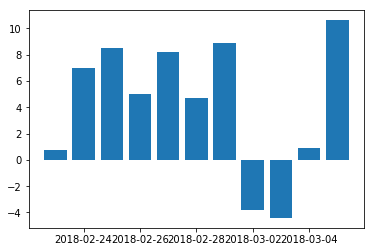

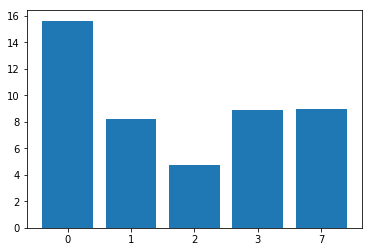

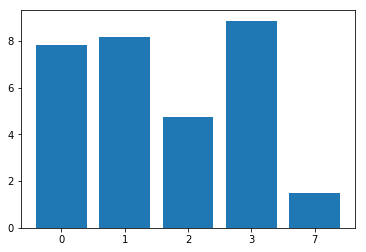

In [134]:
by_date = plt.bar(df2['Date Only'], df2['weightedSum'])
plt.show()
by_day.sum = plt.bar(df3['wkndLbel'], df3['daySum'])
plt.show()
by_day.mean = plt.bar(df3['wkndLbel'], df3['dayMean'])
plt.show()

In [131]:
#hashtags = ['#guns since:2018-02-14', '#maga']

In [23]:
#targets = [hashtags]